In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5690790539971414073
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4991025152
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6188569656151844230
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [3]:
import cv2, sys
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import glob
import os
from tqdm import tqdm
import time
from PIL import Image, ImageEnhance, ImageChops
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.utils import to_categorical

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LeakyReLU


In [5]:
from importlib import reload

In [6]:
np.random.seed(0)
tf.random.set_seed(0)

In [7]:
b_size=5

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.5,
                                   zoom_range=0.5,
                                   horizontal_flip=True,
                                   fill_mode="nearest")
train_generator = train_datagen.flow_from_directory('D:/deeplearning_image/train/',target_size=(200,200),
                                                    batch_size=b_size, class_mode='categorical')

Found 1096 images belonging to 2 classes.


In [9]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory('D:/deeplearning_image/validation/',target_size=(200,200),
                                                    batch_size=b_size, class_mode='categorical')

Found 364 images belonging to 2 classes.


In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('D:/deeplearning_image/test/',target_size=(200,200),
                                                    batch_size=b_size, class_mode='categorical')

Found 366 images belonging to 2 classes.


In [11]:
test_generator.class_indices

{'castle': 0, 'general': 1}

In [12]:
model = Sequential()
model.add(Conv2D(20, (3, 3), input_shape=(200,200,3)))
model.add(Activation(LeakyReLU(alpha=0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(20, (3, 3)))
model.add(Activation(LeakyReLU(alpha=0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(40, (3, 3)))
model.add(Activation(LeakyReLU(alpha=0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(40))
model.add(Activation(LeakyReLU(alpha=0.01)))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 20)      560       
_________________________________________________________________
activation (Activation)      (None, 198, 198, 20)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 20)        3620      
_________________________________________________________________
activation_1 (Activation)    (None, 97, 97, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 40)        7

In [14]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.0002),\
              metrics=['accuracy'])

In [15]:
steps_train = len(train_generator)
steps_validation = len(validation_generator)
setps_test = len(test_generator)

In [16]:
steps_train

220

In [17]:
setps_test

74

In [18]:
steps_validation

73

In [19]:
history = model.fit_generator(
       train_generator,
       steps_per_epoch=steps_train,
       epochs=20,
       validation_data=validation_generator,
       validation_steps=steps_validation )

Epoch 1/20
220/220 [==============================] - 11s 51ms/step - loss: 0.3910 - accuracy: 0.8002 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 2/20
220/220 [==============================] - 10s 44ms/step - loss: 0.0909 - accuracy: 0.9717 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 3/20
220/220 [==============================] - 10s 44ms/step - loss: 0.0419 - accuracy: 0.9872 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/20
220/220 [==============================] - 10s 44ms/step - loss: 0.0296 - accuracy: 0.9936 - val_loss: 2.0261e-04 - val_accuracy: 1.0000
Epoch 5/20
220/220 [==============================] - 10s 44ms/step - loss: 0.0521 - accuracy: 0.9836 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/20
220/220 [==============================] - 10s 44ms/step - loss: 0.0271 - accuracy: 0.9927 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 7/20
220/220 [==============================] - 10s 44ms/step - loss: 0.0196 - accuracy: 0.9945 - val_loss: 4.0977e-05 - val_a

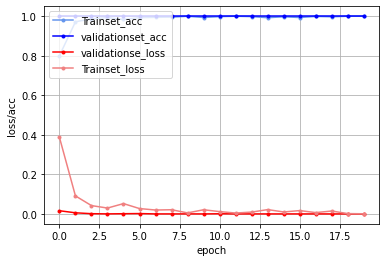

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='cornflowerblue', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='blue', label='validationset_acc')
plt.plot(x_len, y_vloss, marker='.', c='red', label='validationse_loss')
plt.plot(x_len, y_loss, marker='.', c='lightcoral', label='Trainset_loss')

plt.legend(loc='upper left')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

In [33]:

model.save_weights('weight/jinsu_weight.ckpt')


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 172: invalid start byte

In [22]:
# model.save('model/jinsu_model')

In [30]:
output = model.predict(test_generator, steps=setps_test)
test_generator.class_indices



{'castle': 0, 'general': 1}

In [31]:
output

array([[2.10961539e-15, 1.00000000e+00],
       [2.35630634e-12, 1.00000000e+00],
       [1.00000000e+00, 5.39899410e-11],
       [2.16354833e-11, 1.00000000e+00],
       [1.00000000e+00, 4.24911717e-10],
       [1.00000000e+00, 3.70562447e-09],
       [1.00000000e+00, 1.19856258e-09],
       [5.55717234e-12, 1.00000000e+00],
       [1.50730532e-16, 1.00000000e+00],
       [2.68957104e-19, 1.00000000e+00],
       [1.00000000e+00, 5.51522550e-10],
       [9.99996185e-01, 3.75544823e-06],
       [1.85414648e-14, 1.00000000e+00],
       [9.99998689e-01, 1.33716230e-06],
       [1.00000000e+00, 2.11766663e-11],
       [1.00000000e+00, 6.85901544e-11],
       [5.59872262e-07, 9.99999404e-01],
       [1.20440604e-13, 1.00000000e+00],
       [1.00000000e+00, 4.78017903e-11],
       [3.24507782e-11, 1.00000000e+00],
       [3.29842577e-11, 1.00000000e+00],
       [2.27693163e-14, 1.00000000e+00],
       [7.74540501e-12, 1.00000000e+00],
       [2.66920315e-17, 1.00000000e+00],
       [7.628810

In [32]:
loss, acc = model.evaluate(test_generator)
acc

74/74 [==============================] - 1s 10ms/step - loss: 2.9867e-07 - accuracy: 1.0000


1.0

In [26]:
# caltech_dir = "D:/deeplearning/mini_test"
# image_w = 300
# image_h = 300
# pixels = image_h * image_w * 3
# X = []
# filenames = []
# files = glob.glob(caltech_dir+"/*.*")
# for i, f in enumerate(files):
#     img = Image.open(f)
#     img = img.convert("RGB")
#     img = img.resize((image_w, image_h))
#     data = np.asarray(img)
#     filenames.append(f)
#     X.append(data)
# X = np.array(X)


In [27]:
# model = load_model('./model_sample.h5')
# prediction = model.predict(X)
# np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
# cnt = 0
# #이 비교는 그냥 파일들이 있으면 해당 파일과 비교. 카테고리와 함께 비교해서 진행하는 것은 _4 파일.
# for i in prediction:
#     pre_ans = i.argmax()  # 예측 레이블
#     print(i)
#     print(pre_ans)
#     pre_ans_str = ''
#     if pre_ans == 0: pre_ans_str = "Geunjeongjeon_Hall"
#     elif pre_ans == 1: pre_ans_str = "Gyeonghoeru"
#     else: pre_ans_str = "없음"
#     if i[0] >= 0.8 : print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
#     if i[1] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
#     cnt += 1
#     # print(i.argmax()) #얘가 레이블 [1. 0. 0.] 이런식으로 되어 있는 것을 숫자로 바꿔주는 것.
#     # 즉 얘랑, 나중에 카테고리 데이터 불러와서 카테고리랑 비교를 해서 같으면 맞는거고, 아니면 틀린거로 취급하면 된다.
#     # 이걸 한 것은 _4.py에.